Polynomial Neighborhoods = BAD

In [70]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

### Read in both Training CSV and Test CSV for Kaggle

In [71]:
# read in Training csv
df = pd.read_csv('../../datasets/train.csv')
df = df.reindex(sorted(df.columns), axis=1)
df.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,SawyerW,74,5,7,531379050,Y,0,NaN,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,NaN,0,1,NAmes,52,7,5,535304180,Y,0,NaN,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,NaN,0,4,Timber,0,5,5,916386060,Y,0,NaN,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,NaN,0,3,SawyerW,59,8,6,906425045,N,0,NaN,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [72]:
# Read in Test CSV for Kaggle
df_test = pd.read_csv('../../datasets/test.csv')
df_test = df_test.reindex(sorted(df_test.columns), axis=1)
df_test.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,908,1020,0,Grvl,4,2fmCon,TA,No,0,0,Fa,1020,0,0,Unf,Unf,N,Norm,Norm,FuseP,112,Fa,TA,AsbShng,AsbShng,NaN,NaN,0,Stone,2,Typ,440,1,Po,Unf,Po,Detchd,1910.0,1928,0,GasA,Gd,2Story,2658,2,Fa,Lvl,Gtl,9142,Inside,69.0,Reg,0,190,RM,0.0,None,NaN,0,4,OldTown,60,8,6,902301120,Y,0,NaN,CompShg,Gable,WD,0,Pave,9,1020,AllPub,0,1910,1950,2006
1,1967,0,0,NaN,6,Duplex,TA,No,0,0,Gd,1967,0,0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,NaN,0,CBlock,2,Typ,580,2,TA,Fin,TA,Attchd,1977.0,1967,0,GasA,TA,1Story,2718,2,TA,Lvl,Gtl,9662,Inside,NaN,IR1,0,90,RL,0.0,None,NaN,0,8,Sawyer,0,4,5,905108090,Y,0,NaN,CompShg,Gable,WD,0,Pave,10,1967,AllPub,170,1977,1977,2006
2,664,832,0,NaN,3,1Fam,Gd,Av,1,0,Gd,100,554,0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,426,2,TA,RFn,TA,Attchd,2006.0,1496,1,GasA,Ex,2Story,2414,1,Gd,Lvl,Gtl,17104,Inside,58.0,IR1,0,60,RL,0.0,None,NaN,0,9,Gilbert,24,5,7,528218130,Y,0,NaN,CompShg,Gable,New,0,Pave,7,654,AllPub,100,2006,2006,2006
3,968,0,0,NaN,2,1Fam,TA,No,0,0,TA,968,0,0,Unf,Unf,Y,Norm,Norm,SBrkr,184,TA,Gd,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Typ,480,2,TA,Unf,Fa,Detchd,1935.0,968,0,GasA,TA,1Story,1989,1,TA,Lvl,Gtl,8520,Inside,60.0,Reg,0,30,RM,0.0,None,NaN,0,7,OldTown,0,6,5,902207150,N,0,NaN,CompShg,Gable,WD,0,Pave,5,968,AllPub,0,1923,2006,2007
4,1394,0,0,NaN,3,1Fam,TA,No,1,0,Gd,785,609,0,BLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,Gd,2,CBlock,1,Typ,514,2,TA,RFn,TA,Attchd,1963.0,1394,1,GasA,Gd,1Story,625,1,TA,Lvl,Gtl,9500,Inside,NaN,IR1,0,20,RL,247.0,BrkFace,NaN,0,7,NAmes,76,5,6,535105100,Y,0,NaN,CompShg,Gable,WD,185,Pave,6,1394,AllPub,0,1963,1963,2009


### Useful for EDA

In [73]:
# Engineer columns on df

df['Garage Area'].fillna(0, inplace=True)
df['Garage Cars'].fillna(0, inplace=True)
df['Yr Built or Remod'] = df['Year Remod/Add'] * df['Year Built']
df['Lot Size House Sqft'] = df['Lot Area'] * df['Gr Liv Area']
df['Overall Qual Sq'] = (df['Overall Qual']**2)
df['Garage Total'] = df['Garage Area'] * df['Garage Cars']

# Engineer columns on df_test

df_test['Garage Area'].fillna(0, inplace=True)
df_test['Garage Cars'].fillna(0, inplace=True)
df_test['Yr Built or Remod'] = df_test['Year Remod/Add'] * df_test['Year Built']
df_test['Lot Size House Sqft'] = df_test['Lot Area'] * df_test['Gr Liv Area']
df_test['Overall Qual Sq'] = (df_test['Overall Qual']**2)
df_test['Garage Total'] = df_test['Garage Area'] * df_test['Garage Cars']

In [74]:
features = ['Yr Built or Remod','Lot Size House Sqft','Overall Qual Sq','Garage Total']

In [75]:
X = df[features]
y = df['SalePrice']

In [76]:
# To Training
poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X)
poly_columns = pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

In [77]:
# To Test

features_test = ['Yr Built or Remod', 'Lot Size House Sqft', 'Overall Qual Sq','Garage Total']

X_before_test = df_test[features_test]

poly = PolynomialFeatures(include_bias=False)
X_poly_test = poly.fit_transform(X_before_test)
X_poly_test_df = pd.DataFrame(X_poly_test, columns=poly.get_feature_names(features_test))
featpoly = list(X_poly_test_df)

X_after_test = X_poly_test_df[featpoly]

X_poly_test_df['Id'] = df_test['Id']
X_poly_test_df.head()

,Yr Built or Remod,Lot Size House Sqft,Overall Qual Sq,Garage Total,Yr Built or Remod^2,Yr Built or Remod Lot Size House Sqft,Yr Built or Remod Overall Qual Sq,Yr Built or Remod Garage Total,Lot Size House Sqft^2,Lot Size House Sqft Overall Qual Sq,Lot Size House Sqft Garage Total,Overall Qual Sq^2,Overall Qual Sq Garage Total,Garage Total^2,Id
0,3724500.0,17625776.0,36.0,440.0,1.387190e+13,6.564720e+13,134082000.0,1.638780e+09,3.106680e+14,6.345279e+08,7.755341e+09,1296.0,15840.0,193600.0,2658
1,3908529.0,19005154.0,25.0,1160.0,1.527660e+13,7.428220e+13,97713225.0,4.533894e+09,3.611959e+14,4.751288e+08,2.204598e+10,625.0,29000.0,1345600.0,2718
2,4024036.0,25587584.0,49.0,852.0,1.619287e+13,1.029654e+14,197177764.0,3.428479e+09,6.547245e+14,1.253792e+09,2.180062e+10,2401.0,41748.0,725904.0,2414
3,3857538.0,8247360.0,25.0,960.0,1.488060e+13,3.181450e+13,96438450.0,3.703236e+09,6.801895e+13,2.061840e+08,7.917466e+09,625.0,24000.0,921600.0,1989
4,3853369.0,13243000.0,36.0,1028.0,1.484845e+13,5.103017e+13,138721284.0,3.961263e+09,1.753770e+14,4.767480e+08,1.361380e+10,1296.0,37008.0,1056784.0,625


In [78]:
# Run to see all columns in df
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [79]:
df.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,Yr Built or Remod,Lot Size House Sqft,Overall Qual Sq,Garage Total
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010,3961880,19991643,36,950.0
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,SawyerW,74,5,7,531379050,Y,0,NaN,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009,3986012,24386024,49,1118.0
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,NaN,0,1,NAmes,52,7,5,535304180,Y,0,NaN,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010,3919671,8373554,25,246.0
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,NaN,0,4,Timber,0,5,5,916386060,Y,0,NaN,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010,4026042,14154088,25,800.0
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,NaN,0,3,SawyerW,59,8,6,906425045,N,0,NaN,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010,3786700,20569575,36,968.0


### Identify Features to Use

#### Features:

Kitchen Qual - numerically scored //
Year Remod/Add * Year Built as Year_Remod_or_Built //
Overall Qual - not modifying //
Neighborhood - dummifying

#### Once Features have been decided upon, we need to Clean them and Feature Engineer them

In [80]:
# Engineer columns on df

df['Yr Built or Remod'] = df['Year Remod/Add'] * df['Year Built']
df['Lot Size House Sqft'] = df['Lot Area'] * df['Gr Liv Area']
df['Overall Qual Sq'] = (df['Overall Qual']**2)
df['Garage Total'] = df['Garage Area'] * df['Garage Cars']

### Once Features have been cleaned, we need to instantiate the model

In [81]:
# Instantiate the model

lr = LinearRegression()

#### If this score sucks, do not proceed

### Do all of the Cleaning and Engineering stuff to the Test.csv for Kaggle

In [82]:
X = poly_columns[featpoly]

In [83]:
# Train, Test, Split

X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state=42)

In [84]:
# Fit the model

lr.fit(X, y)

LinearRegression()

In [85]:
# Train Score

lr.score(X_train, y_train)

0.8386266928958483

In [86]:
# Test Score

lr.score(X_validate, y_validate)

0.859003779207085

In [87]:
# Cross-Val-score

cross_val_score(lr, X_train, y_train).mean()

0.7534187965254722

In [102]:
# R2 score for the Baseline model is 0

In [103]:
# Baseline Model - in dollars
baseline = y.mean()
baseline

181469.70160897123

### Prediction

In [89]:
# Make Predictions 

preds = lr.predict(X_validate)
preds

array([139306.41328893, 221315.91464276, 281009.9117874 , 119739.12596516,
       214094.52715026, 356620.54215328, 171269.8024555 , 288054.52301241,
       159624.82296419, 108804.47818028, 145769.54847303, 202319.32395724,
       170912.89407414,  99609.966895  , 123317.46308541, 127331.57516495,
       117582.23057925, 227319.95312484, 396967.50922776, 238201.86048352,
       216164.16476318, 192504.99934666, 153492.04503237, 111181.26226808,
       127873.48071607, 228922.89093956, 159337.67134598, 117992.1980102 ,
       252141.5244609 , 101061.72885363, 300512.04082567, 124368.50426512,
       124372.5477375 , 197471.32789781, 216522.21273478,  90991.54330832,
       166949.11501231, 236805.44487196, 302295.15860324, 101584.02463376,
       184030.70297803, 197705.54481869, 278860.46452539, 170856.3921768 ,
        90399.19101038, 157140.31184542, 132486.66997305, 119745.50846589,
       304915.66011606, 146762.88475152, 353138.46923698,  81843.99833358,
       134271.14464118, 2

In [90]:
# Residuals - Actual minus predictions
residuals = y_validate - preds

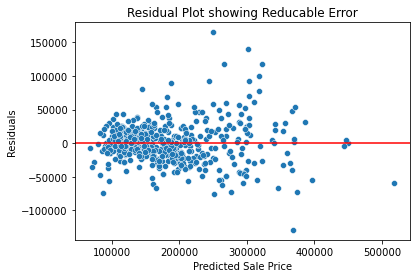

In [91]:
# Plot residuals to evaluate Epsilon (irreducable error)

plt.axhline(y=0, color='r')
sns.scatterplot(x = preds, y = residuals)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot showing Reducable Error');

484.5919725272222

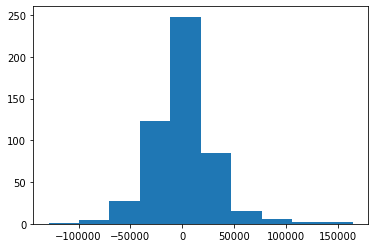

In [92]:
# Hist of residuals
plt.hist(residuals)
residuals.mean()

#### Modify Test Using Poly from Above

In [93]:
X_poly_test_df.shape

(878, 15)

In [94]:
test_preds = lr.predict(X_poly_test_df[featpoly])
test_preds

array([ 132605.42875134,  161924.40783741,  241568.12960728,
        126018.82074224,  157292.82981651,   92070.58721284,
        118818.9672739 ,  137762.08013021,  185771.2598371 ,
        163840.39282458,  159037.31461822,  134902.36404885,
        154345.06413473,  264649.20133222,  164307.96569665,
        138090.06312731,  157027.8007104 ,  119627.12640666,
        178058.10046733,  215277.10713243,  128906.14230703,
        128188.42127593,  174104.9259725 ,  180023.3045494 ,
        204465.81303717,  116830.42905164,  142870.72297938,
        115893.29353969,  147133.65717538,   73486.08901172,
        108024.00068414,   96162.1386562 ,  220447.33829736,
        145742.61024786,  218020.93273648,  223218.69810336,
        100624.27072988,  104177.6772414 ,  129118.00939552,
        198377.4200497 ,  153410.9946115 ,  223435.28006883,
        141174.96041366,  157657.80622534,  177361.00017157,
         93664.71162293,  228162.6270287 ,  116770.84538691,
        116454.82987453,

In [95]:
# Create target column (SalePrice) in df_test df
X_poly_test_df['SalePrice'] = test_preds

In [96]:
X_poly_test_df['SalePrice'].describe()

count       878.000000
mean     178222.952286
std       72989.427519
min     -370271.832729
25%      126952.716858
50%      160443.767446
75%      213370.224002
max      517654.852697
Name: SalePrice, dtype: float64

In [97]:
kaggle_submission = X_poly_test_df[['Id', 'SalePrice']]

In [98]:
kaggle_submission.head()

,Id,SalePrice
0,2658,132605.428751
1,2718,161924.407837
2,2414,241568.129607
3,1989,126018.820742
4,625,157292.829817


In [99]:
kaggle_submission.set_index('Id', inplace=True)

In [100]:
kaggle_submission.head()

,SalePrice
Id,
2658,132605.428751
2718,161924.407837
2414,241568.129607
1989,126018.820742
625,157292.829817


In [101]:
# Save Submission to CSV
kaggle_submission.to_csv('../../kaggle_submissions/modelThree.csv')